# Alucar - Analisando as Vendas

In [2]:
import pandas as pd

In [6]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [7]:
alucar = pd.read_csv('alucar.csv')

In [11]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [14]:
print(f'Quantidade de dados nulos: {alucar.isna().sum().sum()}')

Quantidade de dados nulos: 0


In [16]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [17]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [18]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [19]:
print(sns.__version__)

0.11.0


<AxesSubplot:xlabel='mes', ylabel='vendas'>

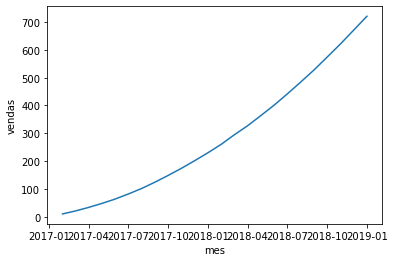

In [20]:
sns.lineplot(x='mes', y='vendas', data = alucar)

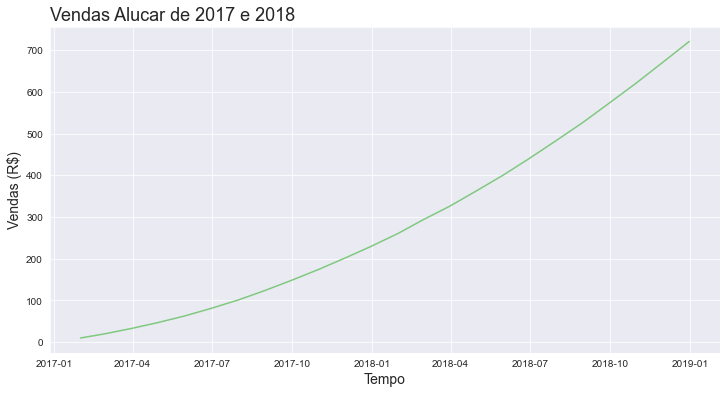

In [33]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc= 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax


In [34]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [35]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


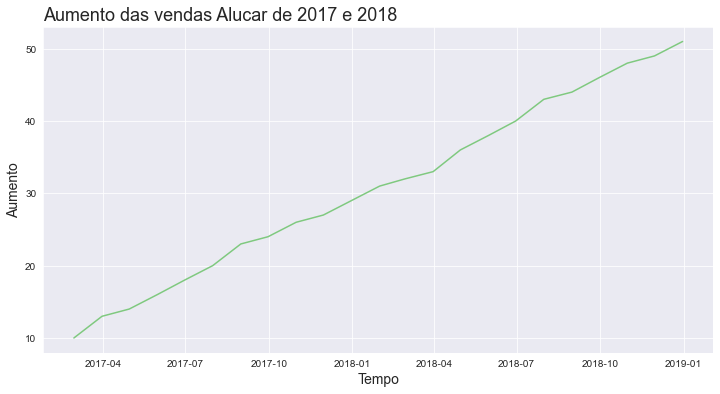

In [37]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc= 'left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax


In [38]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc= 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax


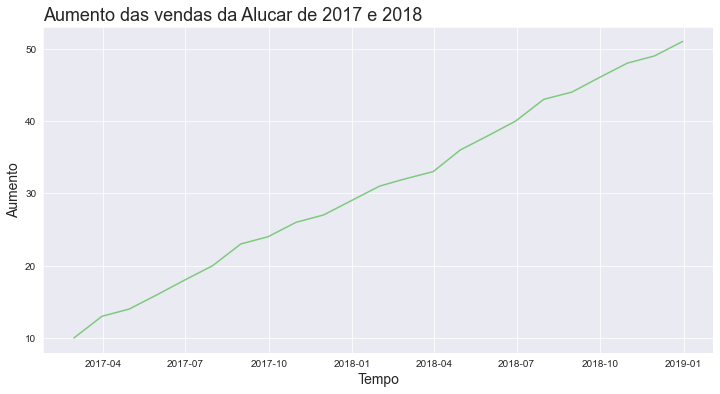

In [39]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [40]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


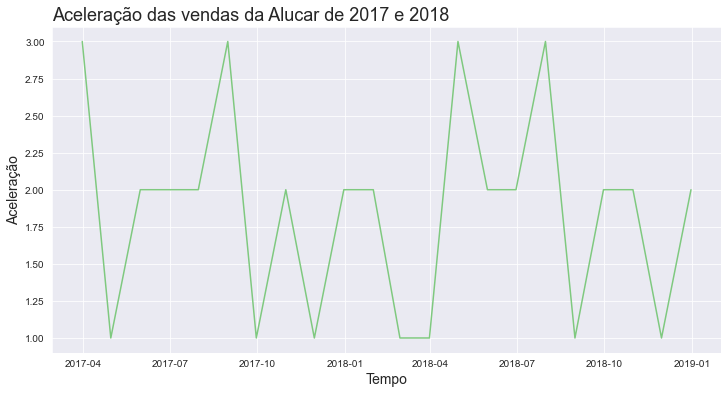

In [41]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

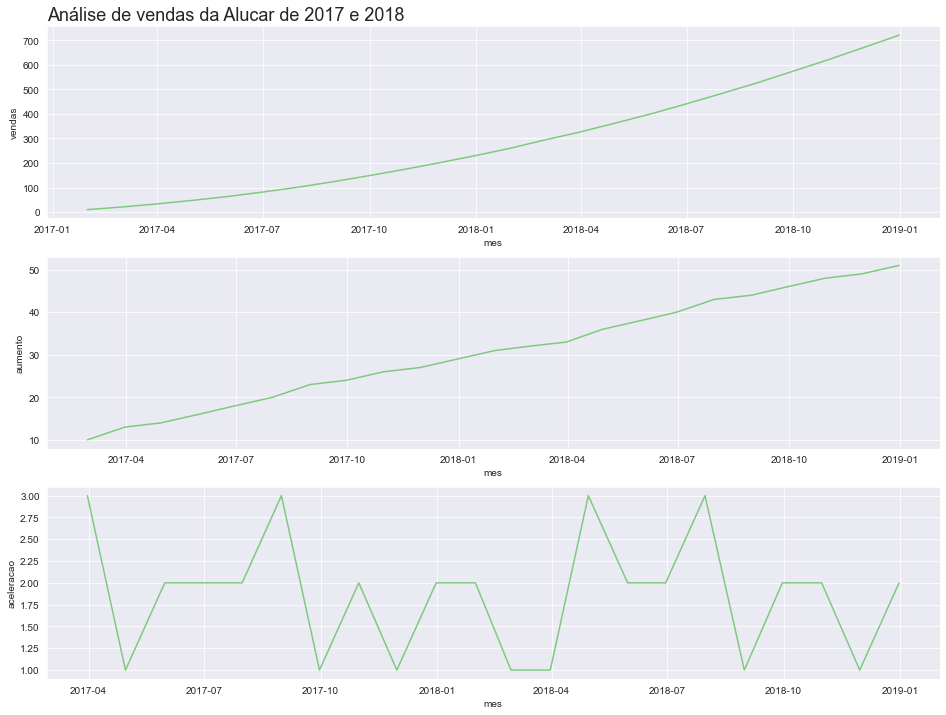

In [42]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize = 18, loc = 'left')
sns.lineplot(x='mes', y='vendas', data = alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data = alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data = alucar)
ax = ax

In [43]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x=x, y=y1, data = dataset)
    plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data = dataset)
    plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data = dataset)
    ax = ax

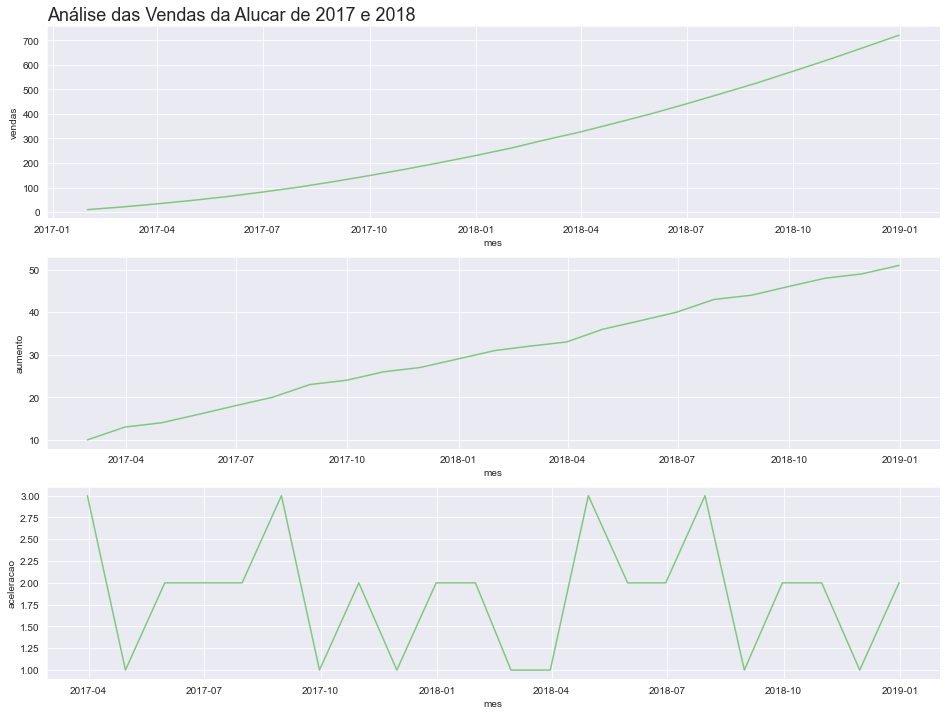

In [44]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das Vendas da Alucar de 2017 e 2018')

In [45]:
from pandas.plotting import autocorrelation_plot

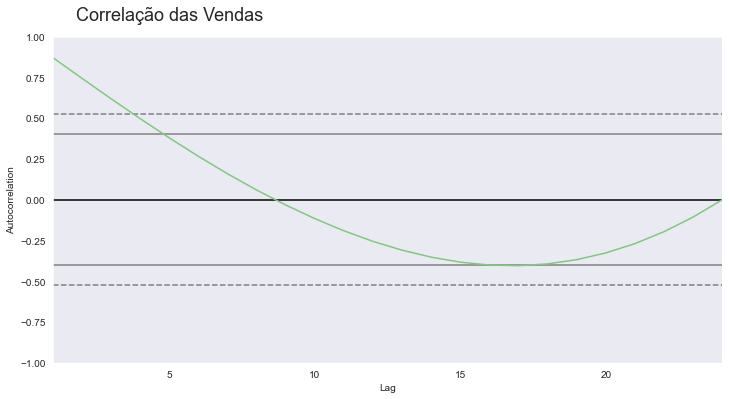

In [51]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

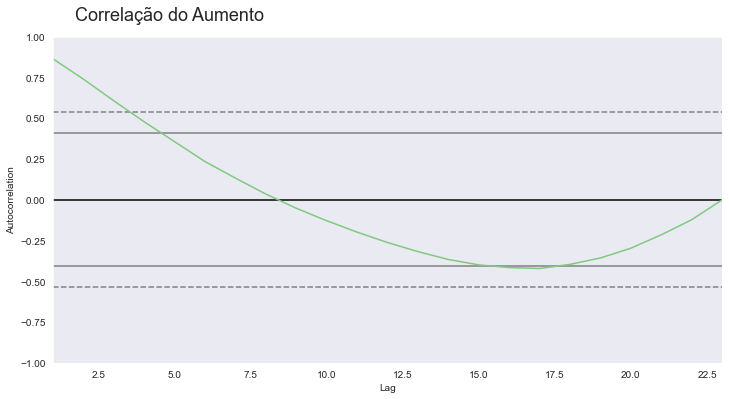

In [54]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação do Aumento', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

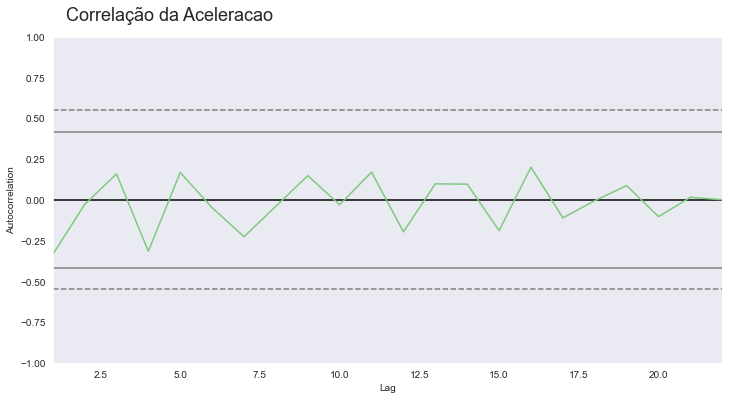

In [55]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da Aceleracao', fontsize = 18, x = 0.26, y = 0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newsletter

In [56]:
assinantes = pd.read_csv('newsletter_alucar.csv')

In [57]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [58]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [59]:
print('Quantidade de linhas e colunas: ', assinantes.shape)
print('Quantidade de dados nulos: ', assinantes.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [60]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [61]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [64]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracaoo,aceleracao
0,2017-01-31,0,NaN,NaN,NaN
1,2017-02-28,10,10.0,NaN,NaN
2,2017-03-31,21,11.0,1.0,1.0
3,2017-04-30,34,13.0,2.0,2.0
4,2017-05-31,49,15.0,2.0,2.0


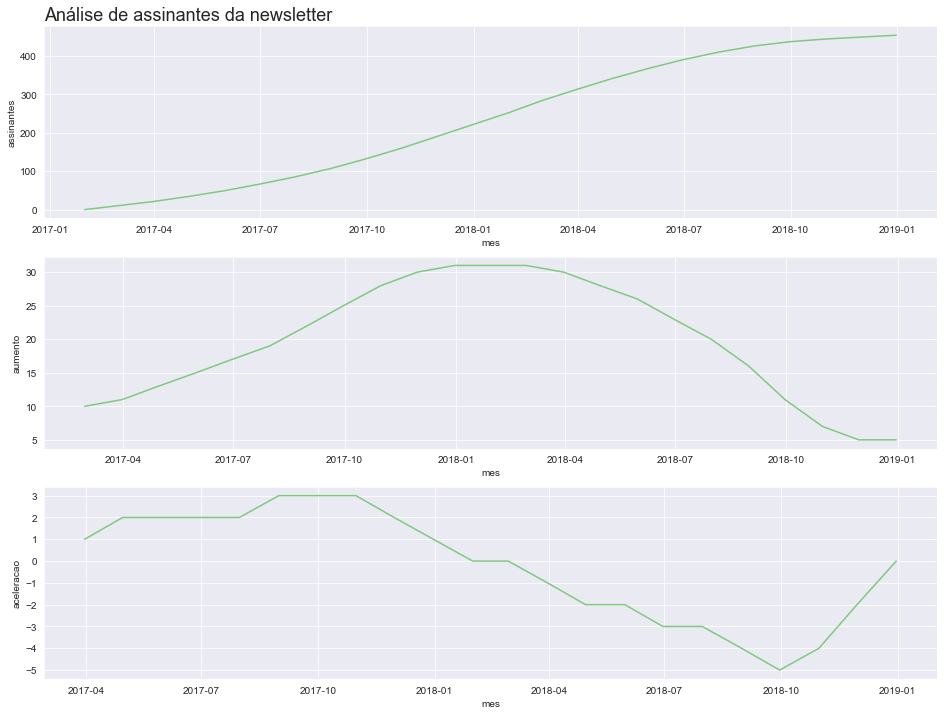

In [65]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

In [67]:
chocolura = pd.read_csv('chocolura.csv')

In [68]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [69]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [70]:
chocolura['mes'] = pd.to_datetime(chocolura.mes)

In [72]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [73]:
print('Quantidade de linhas : ', chocolura.shape)
print('Quantidade de dados nulos : ', chocolura.isna().sum().sum())

Quantidade de linhas :  (24, 2)
Quantidade de dados nulos :  0


In [74]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


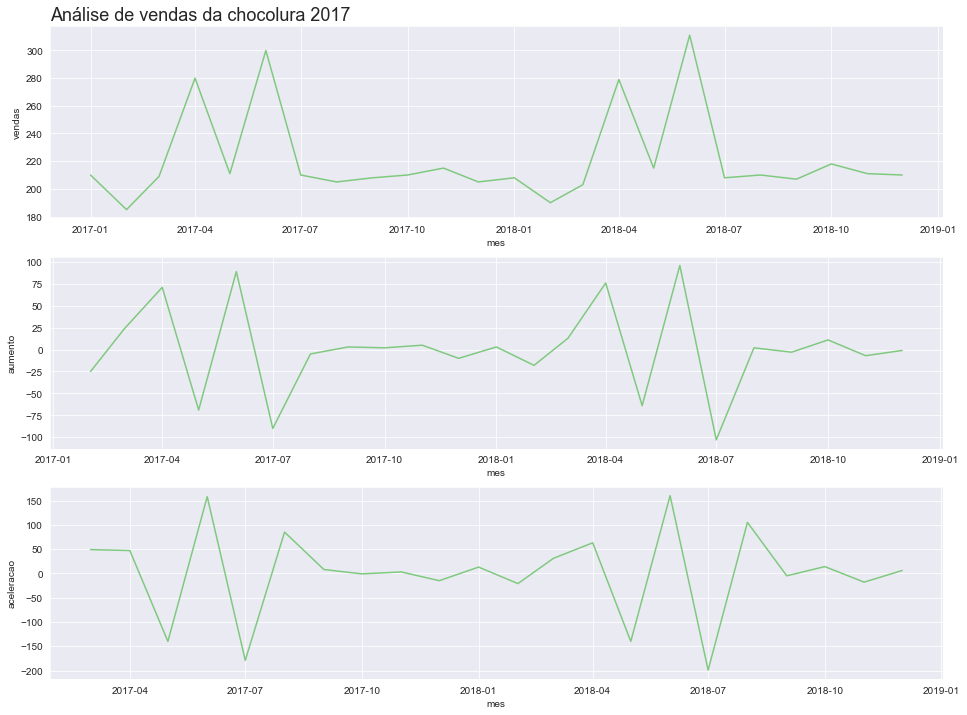

In [75]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da chocolura 2017')

# Chocolura - Vendas diárias(Outubro e Novembro)

In [81]:
vendas_por_dia= pd.read_csv('vendas_por_dia.csv')

In [82]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [83]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [84]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)

In [85]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [86]:
print('Quantidade de linhas e colunas: ', vendas_por_dia.shape)
print('Quantidade de dados nulos: ', vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [87]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


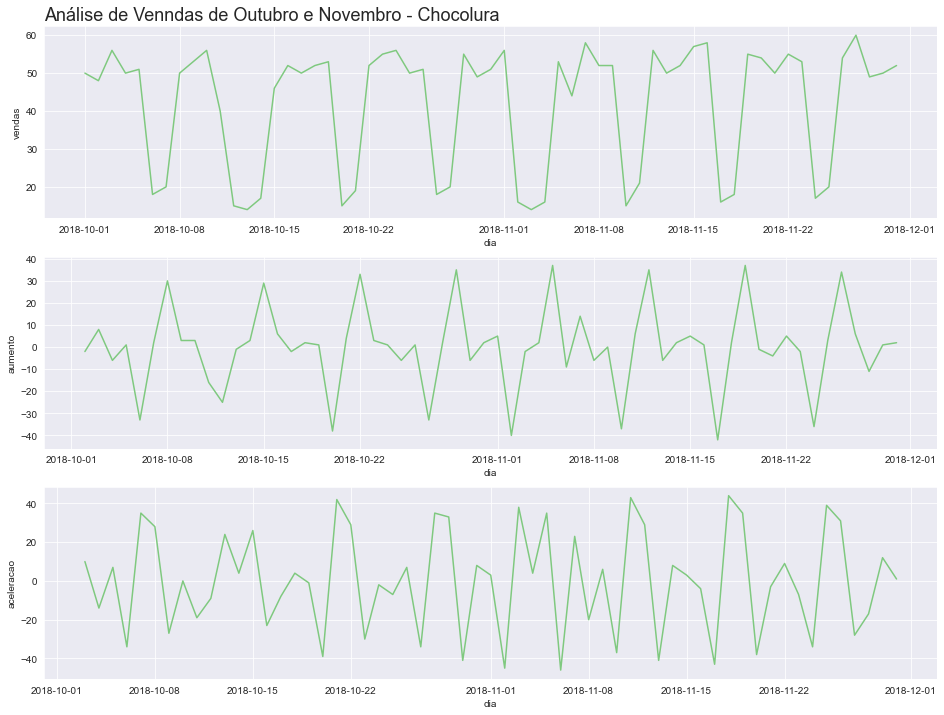

In [88]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de Venndas de Outubro e Novembro - Chocolura')

# Analisando a Sazonalidade

In [96]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [98]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [100]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [102]:
vendas_dias = {
    'Monday' : 'Segunda',
    'Tuesday' : 'Terca',
    'Wednesday' : 'Quarta',
    'Thursday' : 'Quinta',
    'Friday' : 'Sexta',
    'Saturday' : 'Sabado',
       'Sunday' : 'Domingo'
}

In [103]:
vendas_por_dia['dia_da_semana'] =  vendas_por_dia['dia_da_semana'].map(vendas_dias)

In [106]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


In [115]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

<ipython-input-115-50062ad17e95>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


In [116]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


# **Correlação das Vendas Diárias**

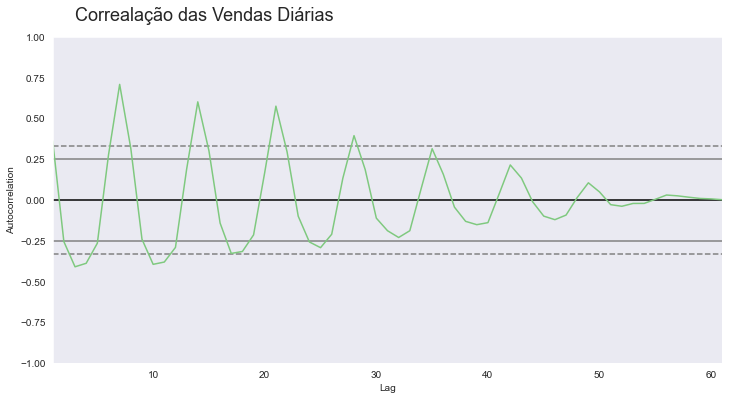

In [129]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correalação das Vendas Diárias', fontsize = 18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

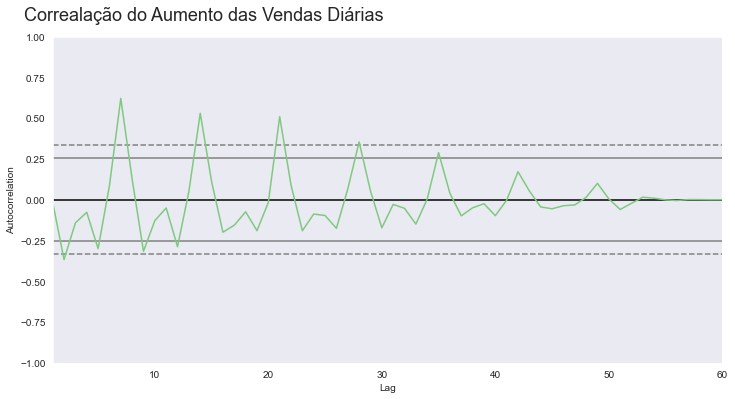

In [130]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correalação do Aumento das Vendas Diárias', fontsize = 18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

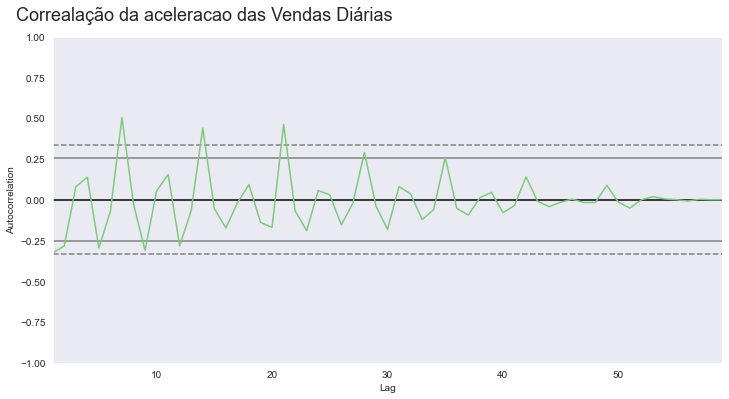

In [132]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correalação da aceleracao das Vendas Diárias', fontsize = 18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

# Cafelura - Análise de Vendas

In [139]:
cafelura = pd.read_csv('cafelura.csv')

In [140]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [141]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [142]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [143]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [144]:
print('Quantidade de linhas e colunas: ', cafelura.shape)
print('Quantidade de dados nulos: ', cafelura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [145]:
cafelura['aumento'] = cafelura['vendas'].diff()
cafelura['aceleracao'] = cafelura['aumento'].diff()

In [146]:
cafelura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


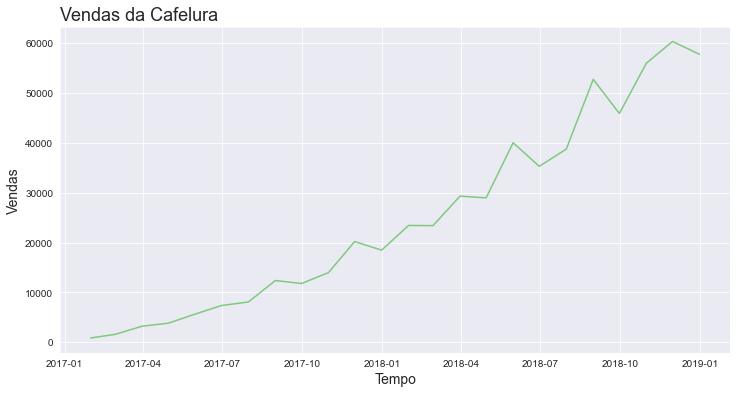

In [148]:
plotar('Vendas da Cafelura', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [149]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')

In [154]:
(quantidade_de_dias_de_fds).head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [157]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [158]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values

In [163]:
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


In [160]:
del cafelura['aumento']

In [161]:
del cafelura['aceleracao']

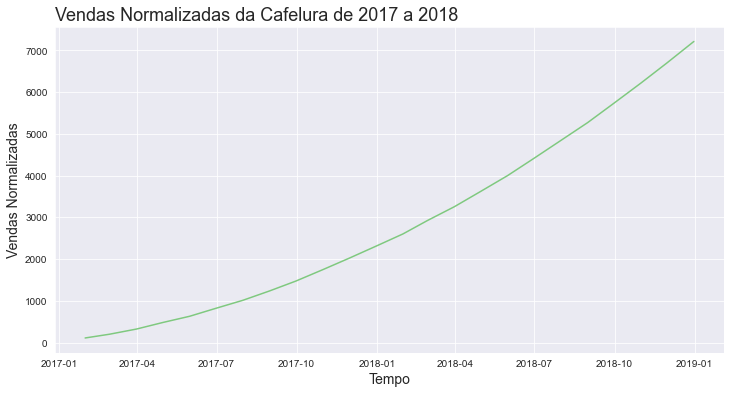

In [164]:
plotar('Vendas Normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

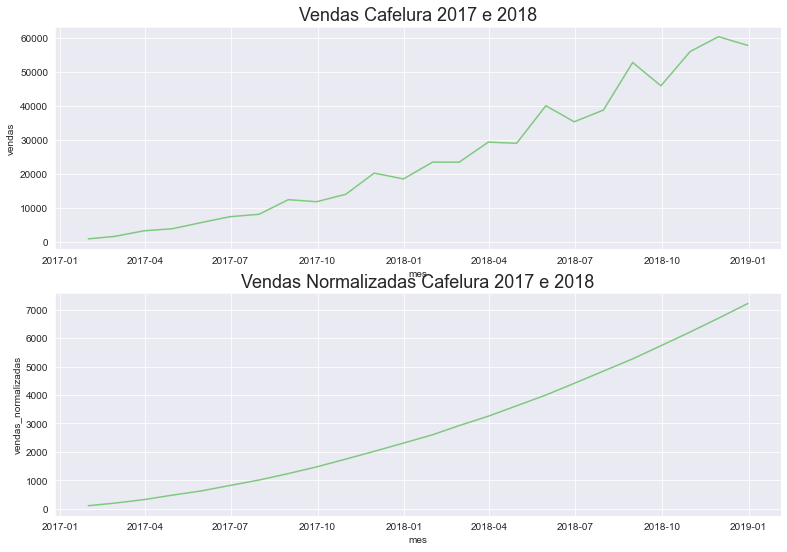

In [167]:
plt.figure(figsize=(13,9))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data=cafelura)
ax=ax


# Statsmodels

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose

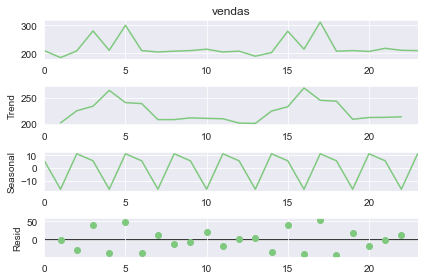

In [171]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

In [172]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [173]:
data = ({
    'observacao': observacao,
    'tendencia' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruido' : ruido
})

In [175]:
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


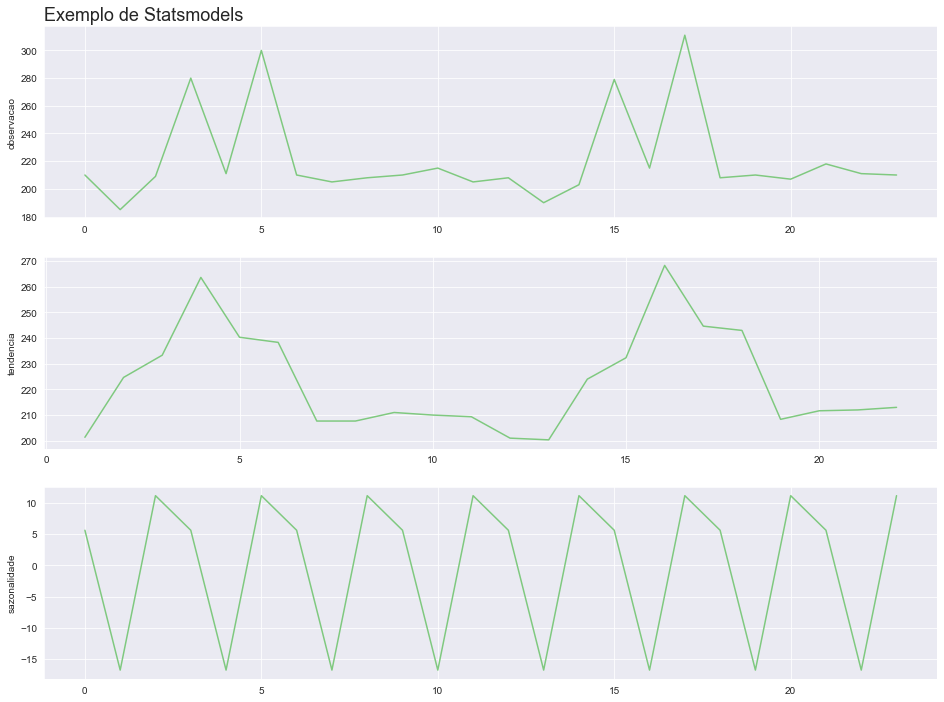

In [178]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de Vendas

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


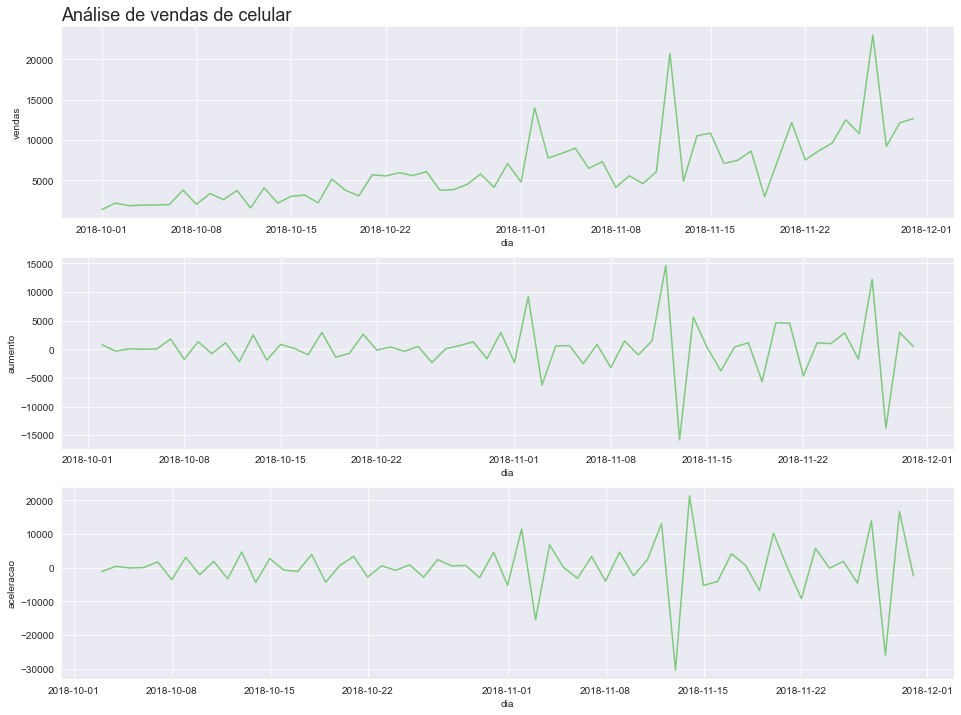

In [179]:
alucel = pd.read_csv('alucel.csv')
alucel.head()
alucel.dtypes
alucel.dia = pd.to_datetime(alucel['dia'])
alucel.dtypes
print('Quantidade de linhas e colunas: ', alucel.shape)
print('Quantidade de dados nulos: ', alucel.isna().sum().sum())
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas de celular')

# Média Móvel

In [180]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [182]:
alucel.head(14)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


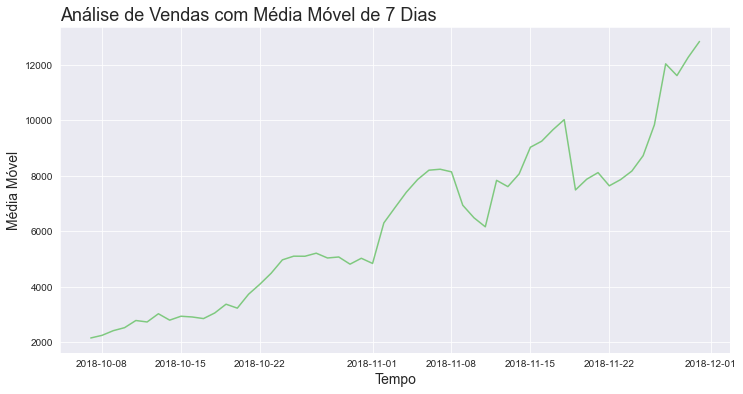

In [183]:
plotar('Análise de Vendas com Média Móvel de 7 Dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [184]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

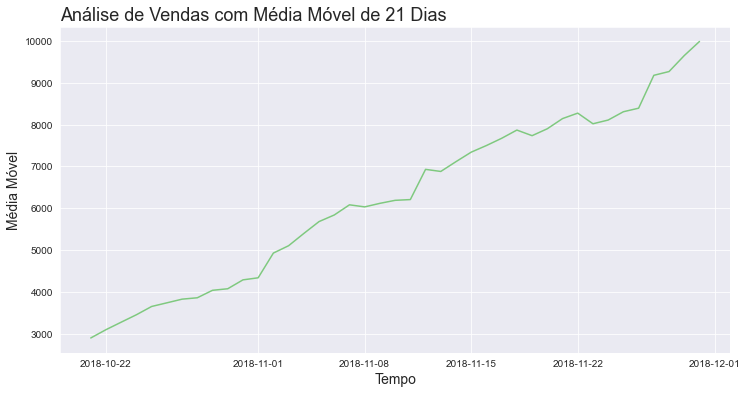

In [185]:
plotar('Análise de Vendas com Média Móvel de 21 Dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

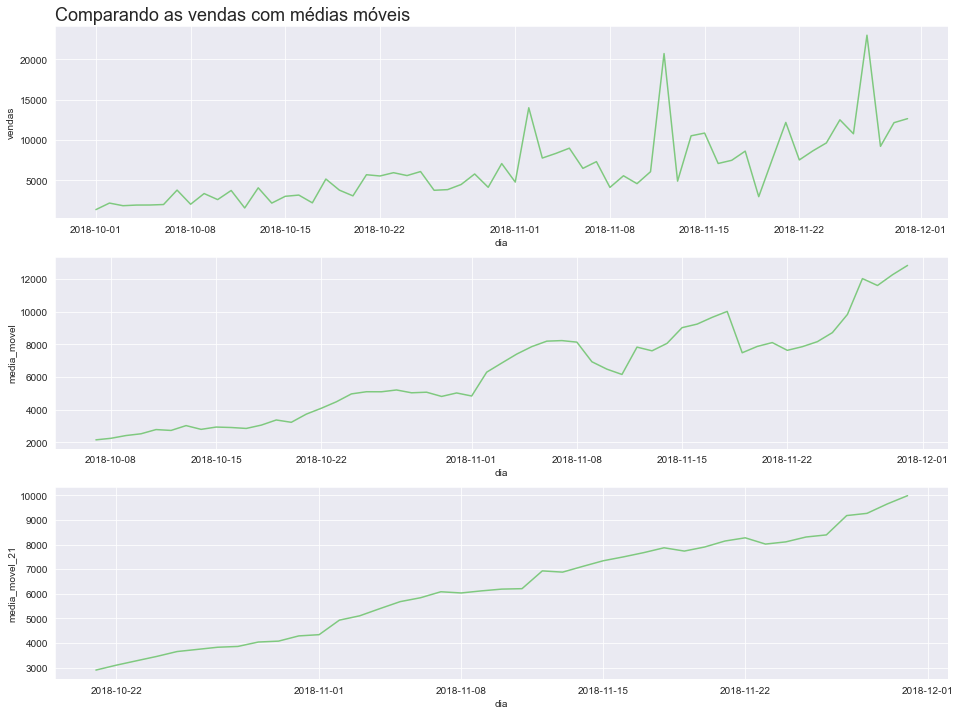

In [186]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com médias móveis')